# Using the HHL algorithm to solve linear systems of equation


## Contents
1. [Introduction](#introduction)
2. [Inquiry Overview](#inquiry-overview)
3. [Description of the HHL](#description-of-the-hhl)
4. [Initial Preparations](#initial-preparations)
5. [Quantum Phase Estimation & Hamiltonian Simulation](#quantum-phase-estimation-&-hamiltonian-simulation)
6. [Quantum Fourier Transform](#quantum-fourier-transform)
7. [Qiskit Implementation](#qiskit-implementation)
8. [References](#references)


## Introduction

<a id='introduction'></a>

Solving linear systems of equations is a fundamental challenge in various fields, from science to engineering. These systems are prevalent, either as standalone problems or as subroutines in more complex computational tasks. The emergence of quantum computing has introduced revolutionary methods for tackling these problems, leveraging the principles of quantum mechanics to potentially offer exponential improvements in efficiency and speed.

In this project, we examine the Harrow-Hassidim-Lloyd (HHL) algorithm, which isa quantum algorithm designed to solve linear systems of equations, with an aim to apply the HHL algorithm to a specific case: solving a 4x4 linear system. We'll be using IBM's Qiskit as our primary toolkit since it is a comprehensive framework for quantum computing.

### Anticipate the following insights

- An in-depth look at the HHL algorithm, its components, and its significance.
- Steps to implement the HHL algorithm using Qiskit, from basic setup to running simulations and real quantum computing experiments.
- A showcase of the algorithm's applications and its potential to solve complex linear systems more efficiently.



## Inquiry Overview

<a id='inquiry-overview'></a>

This project aims to solve the following tailored linear system of equations problem:

$$
A = \begin{bmatrix}
    4 & 1 & 0 & 0 \\
    1 & 3 & 2 & 0 \\
    0 & 2 & 3 & 1 \\
    0 & 0 & 1 & 4 
\end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix}
    1 \\
    2 \\
    2 \\
    1
\end{bmatrix}
$$

The goal is to find a vector $\mathbf{x}$ such that $A\mathbf{x} = \mathbf{b}$.

In [34]:
import numpy as np

# the givens: matrix A & vector b
A = np.array([[4, 1, 0, 0],
              [1, 3, 2, 0],
              [0, 2, 3, 1],
              [0, 0, 1, 4]])
b = np.array([1, 2, 2, 1])
# the goal: solving Ax = b to find x
x = np.linalg.solve(A, b)

# now we normalize  x to get the normalized state vector tilde{x}
x_norm = x / np.linalg.norm(x)

x, x_norm

(array([0.15789474, 0.36842105, 0.36842105, 0.15789474]),
 array([0.27854301, 0.64993368, 0.64993368, 0.27854301]))

The solution to the system $ A\mathbf{x} = \mathbf{b} $ is given by the vector:
$$
\mathbf{x} = \begin{bmatrix}
    0.15789474 \\
    0.36842105 \\
    0.36842105 \\
    0.15789474
\end{bmatrix} 
$$

Once calculated, the normalized state vector $ \tilde{\mathbf{x}} $ is:

$$
\tilde{\mathbf{x}} = \frac{1}{\sqrt{\sum_{i=1}^{4} x_i^2}} \begin{bmatrix}
    0.15789474 \\
    0.36842105 \\
    0.36842105 \\
    0.15789474
\end{bmatrix} 
$$

To find the normalized state vector $ \tilde{\mathbf{x}} $, each element of $ \mathbf{x} $ is divided by the norm of $ \mathbf{x} $.This normalized state vector $ \tilde{\mathbf{x}} $ is the output by the HHL circuit and is expressed as a proportion of its elements over the vector's norm.

The normalized state vector $\tilde{\mathbf{x}}$ for the  linear system $A\mathbf{x} = \mathbf{b} $ is given by:

$$
\tilde{\mathbf{x}} = \begin{bmatrix}
    0.2785 \\
    0.6499 \\
    0.6499 \\
    0.2785
\end{bmatrix} 
$$

This vector represents the solution vector $ \mathbf{x} $ normalized to unit length, making it suitable for representation in a quantum state.

## Description of the HHL

<a id='description-of-the-hhl'></a>

The HHL algorithm exploits various quantum computing principles, each contributing to its unique approach and efficiency.

### Key Quantum Computing Concepts in the HHL Algorithm

1. **Quantum Phase Estimation (QPE)**:
   - **Purpose**: The QPE is used for the precise estimation of the eigenvalues of the matrix $ A $. 
   - **Function**: In the HHL algorithm, QPE is a critical step for understanding the properties of $ A $ and is essential for encoding these properties onto a quantum state.
   - **Application**: QPE operates on quantum states and entangles them with an ancillary register that holds the estimated eigenvalues.

<br> 

2. **Hamiltonian Simulation**:
   - **Purpose**: Hamiltonian Simulation involves simulating the time-evolution of a quantum system that is represented by the matrix $ A $.
   - **Function**: This simulation is pivotal in applying the dynamics of $ A $ to the quantum state. It effectively 'encodes' the matrix into quantum operations.
   - **Application**: In the context of the HHL algorithm, the Hamiltonian Simulation is used to replicate the effect of $ A $ on the quantum state, thus linking the matrix's characteristics directly to quantum computation.

<br>

3. **Controlled Operations**:
   - **Purpose**: Controlled operations are vital in ensuring that certain quantum gates are applied conditionally, depending on the state of specific qubits.
   - **Function**: These operations are essential for manipulating quantum states in a controlled manner, particularly in the context of implementing the algorithm on a quantum circuit.
   - **Application**: In HHL, controlled operations are used to apply transformations based on the results of the QPE and Hamiltonian Simulation, allowing for the eventual construction of the solution state.

### Steps of the HHL Algorithm

1. **Initial State Preparation**: Encoding the vector $ \mathbf{b} $ into a quantum state $ |b\rangle $.
2. **Applying QPE**: To estimate the eigenvalues of $ A $, leading to a quantum state entangled with the eigenvalues.
3. **Hamiltonian Simulation**: Replicating the effect of $ A $ on the quantum state.
4. **Controlled Rotations**: Based on the outcomes of QPE, applying transformations to obtain a state close to $ A^{-1}|b\rangle $.
5. **Uncomputing and Measurement**: Reverting the QPE and measuring the final state to extract information about the solution $ \mathbf{x} $.


In [35]:
import numpy as np
from matplotlib import pyplot as plt

from qiskit import Aer, transpile, assemble, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.utils.mitigation import complete_meas_cal

token_file = 'api.txt'
with open(token_file, 'r') as file:
    token = file.read().strip()

IBMQ.save_account(token)
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2023-12-08 17:47:42,679: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-12-08 17:47:43,313: Credentials are already in use. The existing account in the session will be replaced.


## Initial Preparations

<a id='initial-preparations'></a>

The first step in setting up the HHL algorithm is creating quantum and classical registersm for a 4x4 matrix. 

- Two qubits in register `nb` for storing the quantum state corresponding to the vector $ |b\rangle $.
- Qubits in register `nl` for storing the eigenvalues of the matrix $ A $ during Quantum Phase Estimation (QPE).
- One qubit in register `na` as an ancilla qubit for controlled operations, which is common in HHL for conditional rotations and other steps.
- A classical register `cb` with bits for measurement outcomes.


/Users/STUFF/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


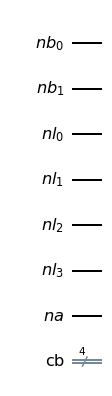

In [36]:
# the eigens of matrix A
eigs, vecs = np.linalg.eig(A)

# to make sure the register we have enough qubits to store the eigenvalues of A 
nl = QuantumRegister(len(eigs), name='nl')

nb = QuantumRegister(2, name='nb')  # register for storing the state \ket{b}
na = QuantumRegister(1, name='na')  # rncilla qubit for controlled operations


# we also need a classical register for measurements
cb = ClassicalRegister(len(nl), name='cb')

# lastly we create the quantum circuit with all these registers
qc = QuantumCircuit(nb, nl, na, cb)

qc.draw('mpl',scale=1)


## Quantum Phase Estimation & Hamiltonian Simulation

<a id='quantum-phase-estimation-&-hamiltonian-simulation'></a>

The QPE loop uses the controlled operations based on the state $|b\rangle$ and the eigenvalue information encoded in the phase oracle to estimate the phase of each eigenvalue and store it in the state of the  `nl`  register. 
This phase information is crucial to perform  Hamiltonian simulation.

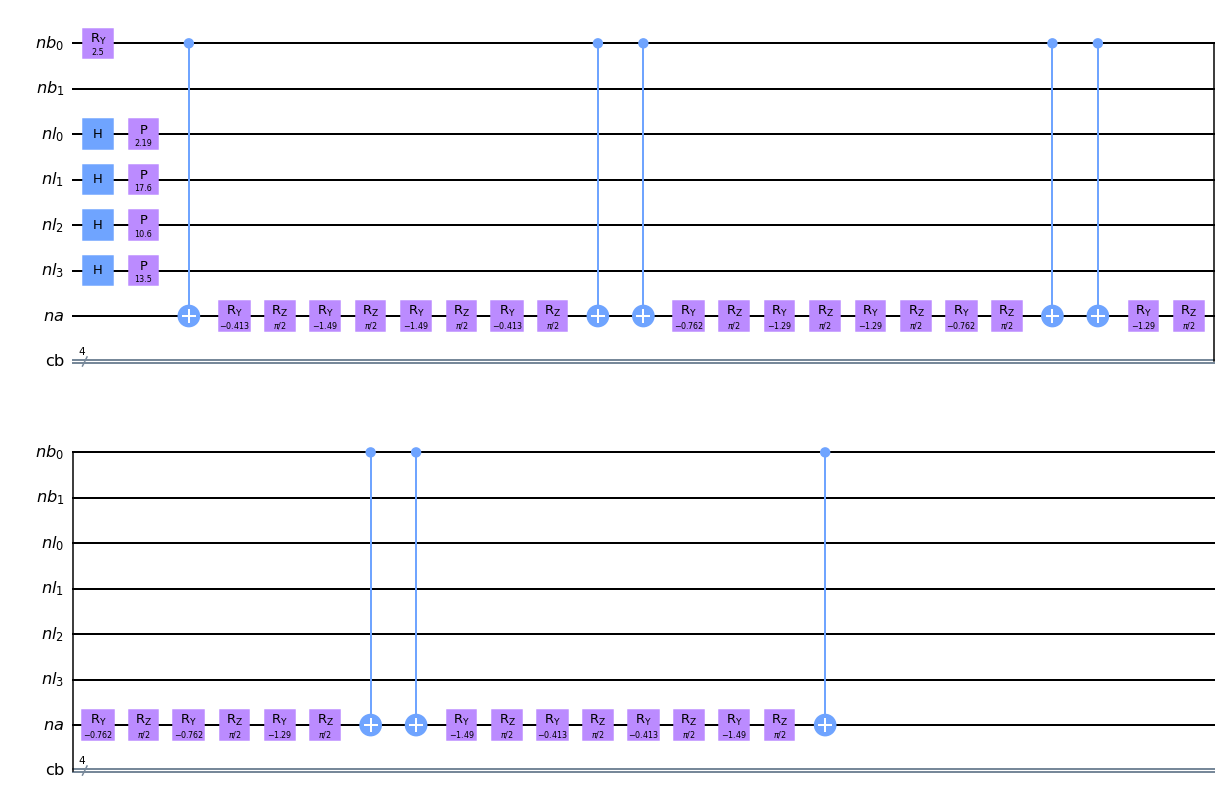

In [37]:
# QPE with matrix A
t = np.pi  # we need to set a fixed value for the time evolution parameter in the QPE loop

# we prepare the \ket{b} state by applying Ry gate to the qubits in the nb register
qc.ry(2*np.arccos(b[0]/np.linalg.norm(b)), nb[0]) 


# QPE loop
for i in range(len(eigs)):
    # apply QPE for each eigenvalue
    qc.h(nl[i])
    qc.p(eigs[i]*t, nl[i])  # apply phase oracle with eigenvalue

    # controlled ops based on state \ket{b}
    qc.cx(nb[0], na[0])
    for j in range(len(vecs[:, i])):  # applying a  controlled rotations based on eigenvector
        qc.ry(-2*np.arcsin(abs(vecs[j, i])), na[0])
        if vecs[j, i].imag > 0:
            qc.rz(-np.pi/2, na[0])
        else:
            qc.rz(np.pi/2, na[0])
    qc.cx(nb[0], na[0])

qc.draw('mpl',scale=1)

## Quantum Fourier Transform

<a id='quantum-fourier-transform'></a>

The functions `qft_dagger` and `qft` implement the inverse Quantum Fourier Transform and Quantum Fourier Transform respectively. The QFT  allows for the transformation of quantum states into the frequency domain. The inverse QFT is used to transform back from the frequency domain to the computational basis.


- **`qft_dagger` function:**
  This function applies the inverse Quantum Fourier Transform (QFT†) to the first `n` qubits in the quantum register `q`.
  - It starts by applying a Hadamard gate to the last qubit.
  - It then applies controlled phase gates (`cp`) with gradually decreasing phase angles between pairs of qubits in a nested loop structure, which essentially unwinds the QFT.
  - Finally, it swaps the qubits to reverse their order, completing the transformation.

<br>

- **`qft` function:**
  This function applies the Quantum Fourier Transform (QFT) to the first `n` qubits in the quantum register `q`.
  - It starts by swapping the qubits to reverse their order.
  - A Hadamard gate is then applied to the first qubit to create superposition.
  - The function then enters a loop where it applies Hadamard gates to subsequent qubits and controlled phase gates (`cp`) with increasing phase angles, building up the QFT.



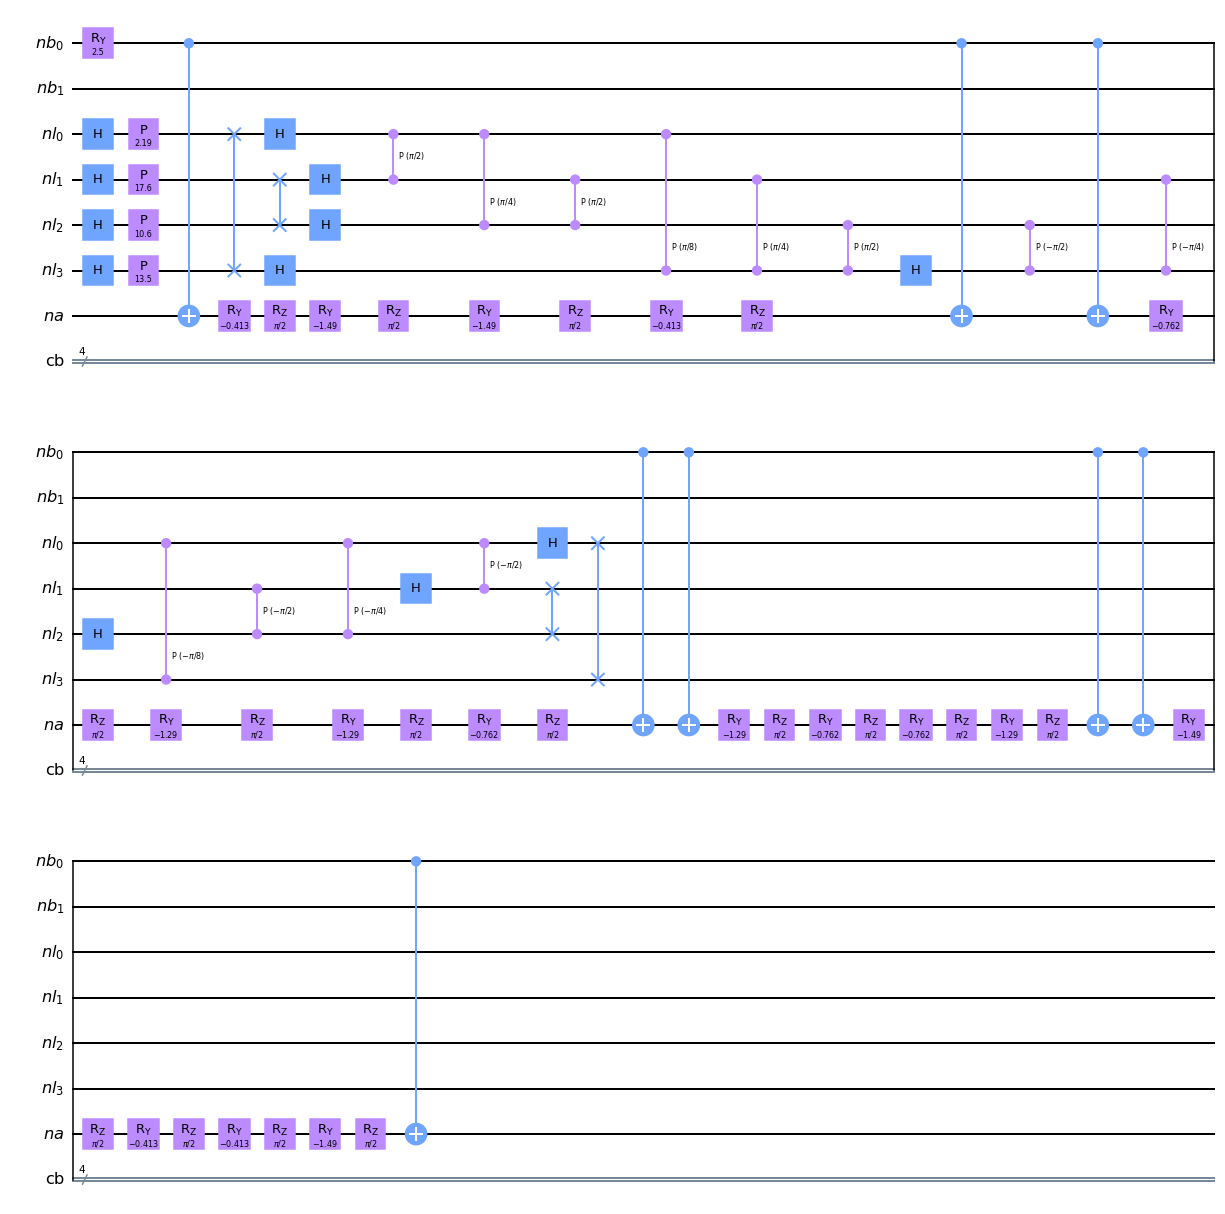

In [38]:
def qft_dagger(circ, q, n):
    """Apply the inverse QFT to the first n qubits in the quantum register q."""
    # lets start by applying H to the last qubit
    circ.h(q[n-1])
    for j in reversed(range(n)):
        for k in reversed(range(j)):
            circ.cp(-np.pi / float(2**(j-k)), q[k], q[j])
        # spplying H gate to all qubits besides the last one
        if j > 0:
            circ.h(q[j-1])
    # swapping the qubits to reverse the order
    for i in range(n//2):
        circ.swap(q[i], q[n-i-1])

def qft(circ, q, n):
    """Apply the QFT to the first n qubits in the quantum register q."""
    #swapping the qubits to reverse the order
    for i in range(n//2):
        circ.swap(q[i], q[n-i-1])
    # applyig H gate to the first qubit
    circ.h(q[0])
    for j in range(n):
        if j+1 < n: # this is to prevent indexing errors
            circ.h(q[j+1])
        for k in range(j):
            circ.cp(np.pi / float(2**(j-k)), q[k], q[j])



# pplies the QFT to the quantum register `nl` in the circuit `qc`
qft(qc, nl, len(nl))

# applies the inverse QFT to the same register, essentially performing the reverse operation
qft_dagger(qc, nl, len(nl))

qc.draw('mpl',scale=1)


## Qiskit Implementation

<a id='qiskit-implementation'></a>

## Simulation and Execution on Real Quantum Hardware
We implement our quantum algorithm in Qiskit for both simulation and execution on real quantum hardware. The process involves:

### Simulation
Measuring the quantum circuit's output into a classical register and analyzing the results with a histogram. The circuit's depth and number of CNOT gates are printed for informational purposes. 
<br>
### Hardware
2. **Hardware Selection:** To run the algorithm on IBM's real quantum hardware, we selects from the aviable backend which at the time was the 'ibm_osaka' backend.
3. **Circuit Compatibility:** Retrieving the device's coupling map to understand qubit connectivity and listing operational qubits as per the device's properties. This ensures our circuit aligns with the hardware's architecture and limitations.
4. **Circuit Preparation:** Transpiling the quantum circuit (`qc`) for the chosen backend with a specific qubit layout. Creating measurement calibration circuits to mitigate real-device measurement errors.
5. **Execution:** Submitting both the transpiled quantum circuit and calibration circuits as a job to the quantum hardware with a predefined number of shots (12345). This approach is crucial to address the practical constraints and inherent noise in current quantum hardware.

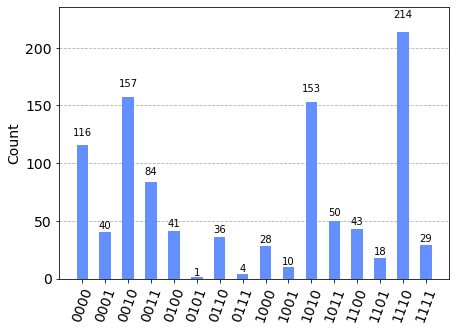

In [39]:
cb = ClassicalRegister(len(eigs), name='cb')
qc.measure(nl, cb)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)


In [40]:
# measure the eigenvalues
qc.measure(nl, cb)

# print circuit information
print(f"Depth: {qc.depth()}")
print(f"CNOTS: {qc.count_ops()['cx']}")
qc.draw(fold=-1)


Depth: 41
CNOTS: 8


┌────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
nb_0: ┤ Ry(2.4981) ├───────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────■────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────■──
      └────────────┘               │                                                                                                                            │              │                                                                                                                                         │    │                                                                                                              │    │                                                                                                              │  
nb_1: ─────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──
          ┌───┐     ┌───────────┐  │                     ┌───┐                                                                                                  │              │                                                                                                    ┌───┐            ┌─┐         ┌─┐     │    │                                                                                                              │    │                                                                                                              │  
nl_0: ────┤ H ├─────┤ P(2.1904) ├──┼─────────X───────────┤ H ├────────────────────■────────────■─────────────────────────■──────────────────────────────────────┼──────────────┼─────────────────────────────────■─────────────────────────■─────────────────────────■──────────────┤ H ├────X───────┤M├─────────┤M├─────┼────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──
          ├───┤     └┬──────────┤  │         │           └───┘        ┌───┐       │P(π/2)      │                         │                                      │              │                                 │                         │             ┌───┐       │P(-π/2)       └───┘    │ ┌─┐   └╥┘   ┌─┐   └╥┘     │    │                                                                                                              │    │                                                                                                              │  
nl_1: ────┤ H ├──────┤ P(17.65) ├──┼─────────┼─────────────X──────────┤ H ├───────■────────────┼────────────■────────────┼─────────────■────────────────────────┼──

In [41]:
available_backends = provider.backends()
print("Available backends:", available_backends)

Available backends: [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [42]:
backend = provider.get_backend('ibm_osaka')  

# get the coupling map from the backend configuration
coupling_map = backend.configuration().coupling_map

# print the coupling map to choose qubits
print("Coupling map:", coupling_map)

properties = backend.properties()
operational_qubits = [qubit for qubit in properties.qubits if qubit]

Coupling map: [[1, 0], [2, 1], [2, 3], [3, 4], [5, 4], [6, 5], [6, 7], [7, 8], [8, 16], [9, 8], [9, 10], [11, 10], [12, 11], [13, 12], [14, 0], [14, 18], [15, 4], [16, 26], [17, 12], [17, 30], [18, 19], [20, 19], [21, 20], [21, 22], [22, 15], [23, 22], [24, 23], [24, 25], [24, 34], [25, 26], [27, 26], [27, 28], [28, 29], [28, 35], [30, 29], [31, 30], [31, 32], [33, 20], [35, 47], [36, 32], [37, 38], [37, 52], [39, 33], [39, 38], [40, 39], [40, 41], [42, 41], [42, 43], [43, 34], [43, 44], [45, 44], [45, 46], [45, 54], [46, 47], [48, 47], [48, 49], [49, 50], [50, 51], [51, 36], [52, 56], [53, 41], [55, 49], [57, 56], [57, 58], [58, 71], [59, 58], [59, 60], [60, 53], [61, 60], [61, 62], [62, 72], [63, 62], [64, 54], [64, 63], [65, 64], [66, 65], [66, 73], [67, 66], [68, 55], [68, 67], [68, 69], [69, 70], [71, 77], [74, 70], [75, 76], [76, 77], [78, 77], [78, 79], [79, 80], [81, 72], [81, 80], [81, 82], [83, 82], [84, 83], [85, 73], [85, 84], [86, 85], [87, 86], [87, 88], [87, 93], [88, 89

In [43]:
backend = provider.get_backend('ibm_osaka')  # calibrate using real hardware
layout = [0, 1, 2, 3, 4, 5, 6]
chip_qubits = 7

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend, initial_layout=layout)


meas_cals, state_labels = complete_meas_cal(qubit_list=layout,
                                            qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=12345)

/var/folders/my/3k6ljkkn2fxf0bmxsr7jkrf00000gp/T/ipykernel_6368/941425735.py:9: DeprecationWarning: The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  meas_cals, state_labels = complete_meas_cal(qubit_list=layout,


## Post-Selection
Post-selection is a crucial step in the Quantum Phase Estimation (QPE) process. After the quantum circuit executes and the measurements are made, the post-selection process filters the results.

The selection aspect keeps only those measurement outcomes where the estimated eigenvalue (derived from the measurement) is within a specified tolerance range of a target eigenvalue. 

This helps in isolating outcomes that are relevant for a specific purpose, like focusing on a particular eigenvalue of the matrix `A`. By doing this, the algorithm enhances the relevance and potential accuracy of the final results, making them more meaningful for the intended application.

{'1001': 54, '0111': 1100, '1000': 432}


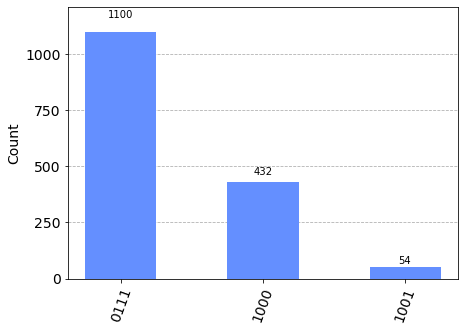

In [44]:
def qft_dagger(circ, n):
    """Apply the inverse QFT to the first n qubits in the circuit."""
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n, 0, -1):
        for m in range(j-1):
            circ.cp(-np.pi/float(2**(j-m-1)), m, j-1)
        circ.h(j-1)

def qpe_with_postselection(A, num_qubits, target_eigval, tolerance):
    """Quantum Phase Estimation algorithm with post-selection."""
    # Eigenvalues and eigenvectors of matrix A
    eigs, vecs = np.linalg.eig(A)


    nb = QuantumRegister(num_qubits, name='nb')
    na = QuantumRegister(num_qubits, name='na')
    cb = ClassicalRegister(num_qubits, name='cb')
    qc = QuantumCircuit(na, nb, cb)


    # eigenstates
    for i in range(num_qubits):
        if np.real(vecs[i, 0]) > 0:
            qc.x(nb[i])

    # H gates
    for qubit in range(num_qubits):
        qc.h(na[qubit])

    # C-U operations
    for qubit in range(num_qubits):
        angle = 2 * np.pi * 2**qubit
        qc.cp(angle, na[qubit], nb[0])

    
    qft_dagger(qc, num_qubits)

    
    qc.measure(na, cb)

    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=12345)
    result = job.result()
    counts = result.get_counts(qc)

    # post-selection process
    selected_counts = {}
    for key, value in counts.items():
        measured_eigval = int(key, 2) / 2**num_qubits
        if np.abs(measured_eigval - target_eigval) <= tolerance:
            selected_counts[key] = value

    return selected_counts


A = np.array([[4, 1, 0, 0],
              [1, 3, 2, 0],
              [0, 2, 3, 1],
              [0, 0, 1, 4]])

num_qubits = 4  
target_eigval = 0.5  
tolerance = 0.1  

selected_counts = qpe_with_postselection(A, num_qubits, target_eigval, tolerance)
print(selected_counts)

plot_histogram(selected_counts)

The histogram shows the distribution of the measured state after post selection. The two most common measured states at the time of measurement were  $\ket{0111}$ with probabiliity $\frac{1100}{1584}$ and $\ket{1000}$ with probabiliity $\frac{432}{1584}$ which are the closest to the target eigenstates.  

## References

<a id='references'></a>

1. A. W. Harrow, A. Hassidim, and S. Lloyd, “Quantum algorithm for linear systems of equations,” Phys. Rev. Lett. 103.15 (2009)
2. https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/hhl_tutorial.ipynb
3. https://github.com/hywong2/HHL_Example/blob/main/HHL_Hector_Wong.ipynb
4. https://github.com/Adirlou/epfl_master_semester_project/blob/master/hhl_2x2.ipynb
5. https://ieeexplore.ieee.org/document/10189828

